In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
#Q1.Loading the dataset
df=pd.read_csv(r"C:\Users\owner\Desktop\DATA SCIENCE AND ANALYTICS COURSE\MACHINE LEARNING\Machine_learning_projects\cardekho_Assignment.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
#Q2.Checking for missing values and printing out the %
missing=df.isnull().sum()

#getting %
percentage_missing=round((missing/len(df))*100,2)
data_dict={"missing_values_counts": missing,
           "missing_values_percentage":percentage_missing}

missing_df=pd.DataFrame(data_dict)
missing_df

,missing_values_counts,missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [4]:
#Q3.Dropping rows where target variable(selling) is missing
df['selling_price'].isnull().sum()
df.dropna(subset=["selling_price"],inplace=True)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [6]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


#### Explain why we can’t train a model with missing target values.
-We can’t train a model with missing target values because the model needs the target to compare predictions against and calculate error, without it the model has no feedback to learn from.

In [7]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [9]:
#Q4.Fill missing values in the “mileage” column with the column’s mean.
df["mileage(km/ltr/kg)"]= df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

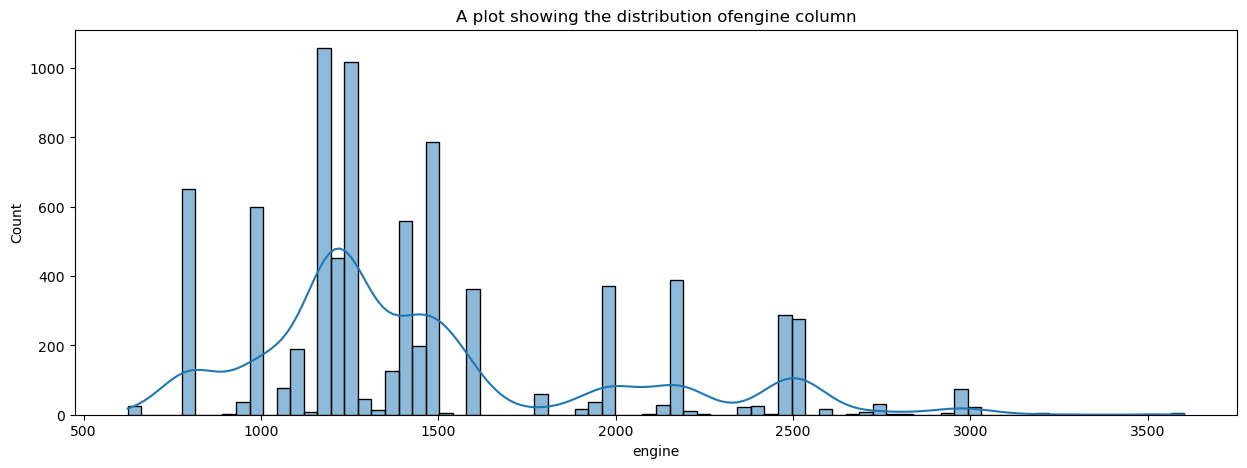

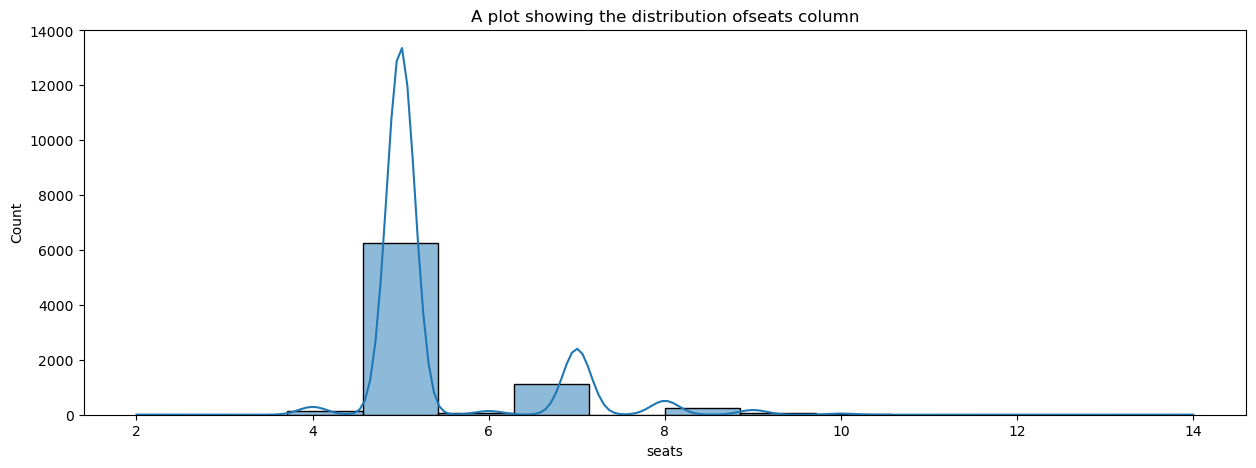

In [10]:
#Visualizing engine and seats to check for distribution #the data is skewed
missing_columns=["engine","seats"]
for col in missing_columns:
    plt.figure(figsize=(15,5))
    sns.histplot(df,x=df[col], kde=True)
    plt.title(f"A plot showing the distribution of{col} column")
    plt.xlabel(col)


In [11]:
#Filling missing values with median
for col in missing_columns:
    df[col] =df[col].fillna(df[col].median())
    print(f"fill missing values for:{col}")
    print("*"*100)

fill missing values for:engine
****************************************************************************************************
fill missing values for:seats
****************************************************************************************************


In [12]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [13]:
#fiiling maxpower with median
med=df["max_power"].mode()
print(med)

0    74
Name: max_power, dtype: object


In [14]:
#to remove quotation marks in the columns
df['max_power']=df['max_power'].str.strip("'\"")

In [15]:
df["max_power"].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [16]:
#using replace
df["max_power"].replace(['',"nan"," ","None"],np.nan,inplace=True)

C:\Users\owner\AppData\Local\Temp\ipykernel_10360\269271980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].replace(['',"nan"," ","None"],np.nan,inplace=True)


In [17]:
df["max_power"]=pd.to_numeric(df["max_power"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [19]:
#to fill maxpower with medin
med=df["max_power"].median()
print(med)

82.0


In [20]:
#to fill missing numbers with
df[col] =df["max_power"].fillna(df["max_power"].median())

#### Explain why filling missing values can sometimes be better than dropping rows.
-Dropping rows reduces the dataset size and also causes loss of information, while filling allows us to keep all data and preserve patterns, leading to more accurate and stable models.

In [21]:
#Q5.Remove duplicate rows from the dataset.
#checking duplicated rows
df.duplicated().sum()

1202

In [22]:
#to remove the duplicates seen
df=df.drop_duplicates()

#### Explain how duplicate rows can affect model training.
-Duplicate rows can affect model training by biasing the model. The repeated data gives extra weight to certain patterns, leading to overfitting and poor generalization to new data.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6720 non-null   float64
 11  seats               6926 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [24]:
#Q6.converting car year into car_age
df["car_age"]=(2025-df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18


In [25]:
#Q7.Check the unique values in the “fuel” column.
df["fuel"].unique()


array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

#### Explain why knowing all possible values in a categorical column is important before encoding.
-Knowing all possible values in a categorical column is important before encoding because if unseen categories appear later the model won’t know how to handle them, causing errors or wrong predictions.


In [26]:
#Q8.Replace inconsistent values in the “transmission” column.
df["transmission"].unique()


array(['Manual', 'Automatic'], dtype=object)

In [27]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6720 non-null   float64
 11  seats               6926 non-null   float64
 12  car_age             6926 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 757.5+ KB


In [29]:
#capitalizing 
df["transmission"]=df["transmission"].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18


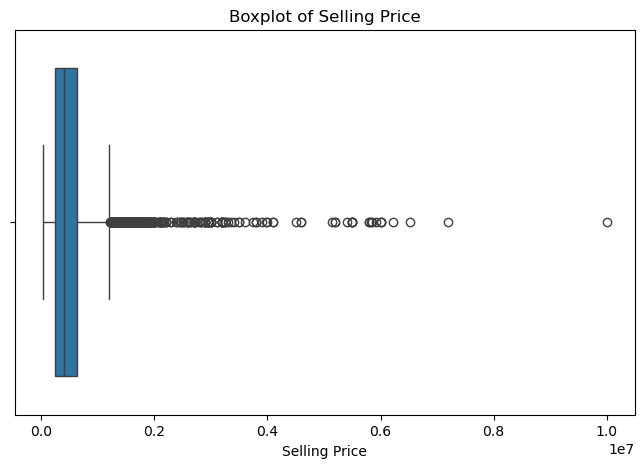

In [30]:
#9.Check if there are any outliers in the “selling price” column using a boxplot.
#Create a boxplot for the price column
#Outliers affect model accuracy by distorting data patterns, skewing statistics, and causing models to overfit or generalize poorly, which makes predictions less reliable.
plt.figure(figsize=(8,5))
sns.boxplot(x=df["selling_price"])
plt.title("Boxplot of Selling Price")
plt.xlabel("Selling Price")
plt.show()


#### Explain why outliers can affect model accuracy.
-Outliers affect model accuracy by distorting data patterns, skewing statistics, and causing models to overfit or generalize poorly, which makes predictions less reliable.


In [31]:
#10. Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
# Remove cars priced below 10,000 or above 5,000,000
df_cleaned = df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]

# Check the new shape of the dataset
print(df_cleaned.shape)


(6906, 13)


#### Explain why setting realistic price limits can help improve model performance.
-Setting realistic price limits helps improve model performance by removing extreme outliers that can distort patterns, confuse the model, and lead to poor predictions. This ensures the model learns from data that reflects real-world values.

In [32]:
#11.Standardize the column names so they are all lowercase and contain underscores instead of spaces.
df.info()
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
#to change mileage title
df= df.rename(columns={'mileage(km/ltr/kg)':'mileage'})
 
#Check the updated column names
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6926 non-null   float64
 10  max_power           6720 non-null   float64
 11  seats               6926 non-null   float64
 12  car_age             6926 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 757.5+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18


In [33]:
#12.Check if any numerical columns are stored as strings and convert them to numbers.



In [34]:
#13.Create a new column for “price per kilometer” by dividing the selling price by the mileage.
# Create a new column 'price_per_kilometer'
df["price_per_kilometer"] = df["selling_price"] / df["mileage"]

df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18,8074.534161


In [35]:
#14. Ensure the dataset index is properly reset after cleaning.
# Reset the index after cleaning
df = df.reset_index(drop=True)

# Check the new index
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18,8074.534161


In [36]:
print(df.index)

RangeIndex(start=0, stop=6926, step=1)


In [37]:
#15. Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
# Save the cleaned dataset as CSV
df.to_csv("cleaned_cars.csv", index=False)


In [38]:
#16.Find the average selling price of cars in the dataset.
# Average selling price
average_selling_price = df["selling_price"].mean()
print(average_selling_price)


517270.6784579844


In [39]:
#17.Find the most common fuel type in the dataset.
# Most common fuel type
most_common_fuel = df["fuel"].value_counts().idxmax()
print(most_common_fuel)


Diesel


In [40]:
print(df["fuel"].value_counts())


fuel
Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: count, dtype: int64


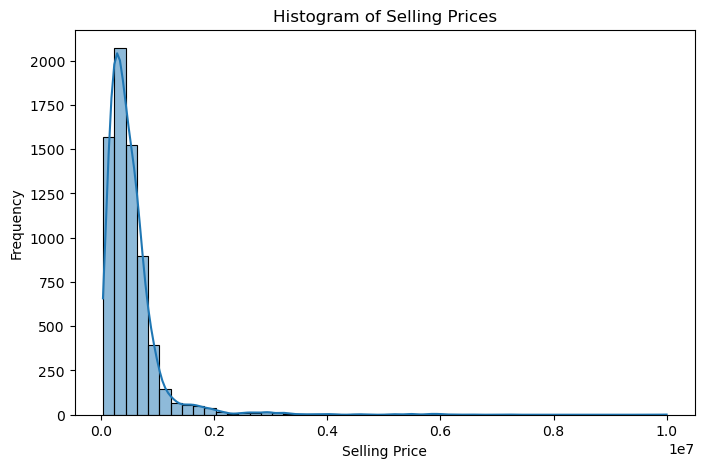

In [41]:
#18.Plot a histogram of the selling prices.
# Histogram of selling prices
plt.figure(figsize=(8,5))
sns.histplot(df["selling_price"], bins=50, kde=True)  # kde=True adds a smooth curve
plt.title("Histogram of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [42]:
#19.Plot the relationship between car age and selling price using a scatter plot.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 6926 non-null   object 
 1   year                 6926 non-null   int64  
 2   selling_price        6926 non-null   int64  
 3   km_driven            6926 non-null   int64  
 4   fuel                 6926 non-null   object 
 5   seller_type          6926 non-null   object 
 6   transmission         6926 non-null   object 
 7   owner                6926 non-null   object 
 8   mileage              6926 non-null   float64
 9   engine               6926 non-null   float64
 10  max_power            6720 non-null   float64
 11  seats                6926 non-null   float64
 12  car_age              6926 non-null   int64  
 13  price_per_kilometer  6926 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 757.7+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,74.00,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,103.52,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,78.00,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,90.00,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,88.20,18,8074.534161


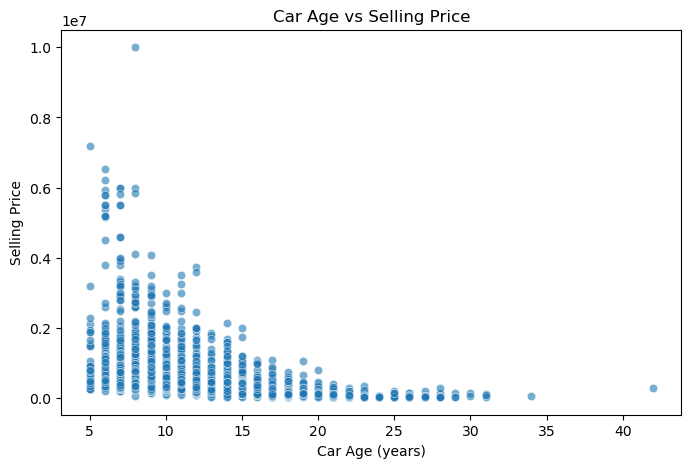

In [43]:
# Scatter plot: car age vs selling price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["car_age"], y=df["selling_price"], alpha=0.6)
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.show()

In [44]:
#20.Group cars by fuel type and find the average selling price for each group.
# Average selling price grouped by fuel type
avg_price_by_fuel = df.groupby("fuel")["selling_price"].mean()
print(avg_price_by_fuel)


fuel
CNG       300499.946429
Diesel    639727.768842
LPG       200421.052632
Petrol    375688.966526
Name: selling_price, dtype: float64


C:\Users\owner\AppData\Local\Temp\ipykernel_10360\4077767023.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["transmission"], palette="pastel")


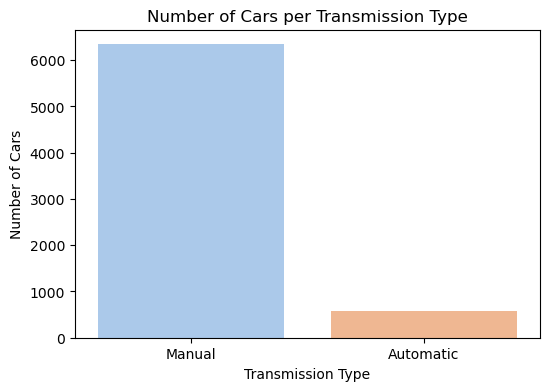

In [45]:
#21. Plot a bar chart showing the number of cars per transmission type.
# Count of cars per transmission type
plt.figure(figsize=(6,4))
sns.countplot(x=df["transmission"], palette="pastel")
plt.title("Number of Cars per Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.show()

In [46]:
#22. Find the car with the highest mileage in the dataset.
# Find the row with the highest mileage
highest_mileage_car = df.loc[df["mileage"].idxmax(), ["name", "mileage"]]

print(highest_mileage_car)

name       Volvo XC90 T8 Excellence BSIV
mileage                             42.0
Name: 170, dtype: object


In [47]:
#23.Calculate the correlation between mileage and selling price.
# Correlation between mileage and selling price
correlation = df["mileage"].corr(df["selling_price"])
print("Correlation between mileage and selling price:", correlation)


Correlation between mileage and selling price: -0.1072820087481007


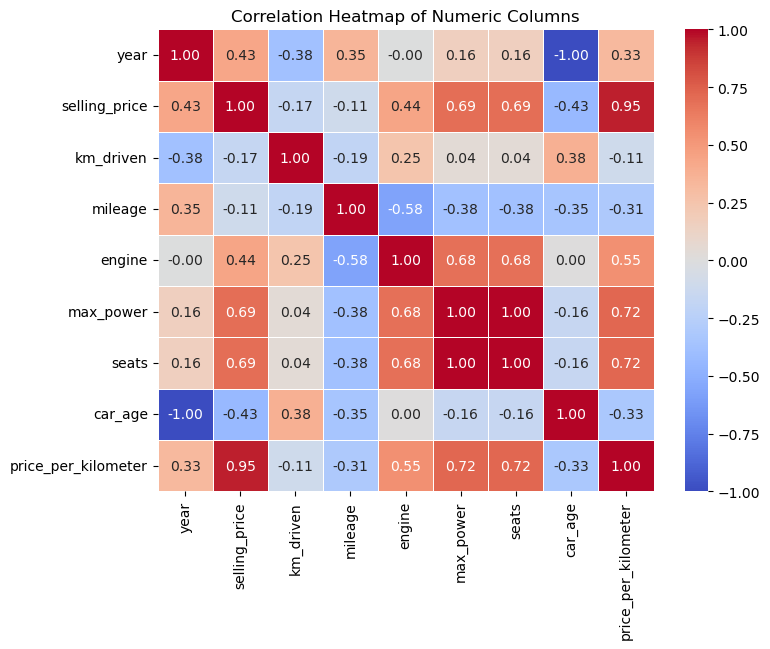

In [48]:
#24.Plot a heatmap showing the correlations between all numeric columns.
# Compute correlations for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [49]:
#25. Check if manual cars are generally cheaper or more expensive than automatic cars.
# Compare average selling price by transmission
avg_price_by_transmission = df.groupby("transmission")["selling_price"].mean()
print(avg_price_by_transmission)


transmission
Automatic    1.309712e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


C:\Users\owner\AppData\Local\Temp\ipykernel_10360\334222771.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="transmission", y="selling_price", data=df, estimator="mean", ci=None, palette="pastel")
C:\Users\owner\AppData\Local\Temp\ipykernel_10360\334222771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="transmission", y="selling_price", data=df, estimator="mean", ci=None, palette="pastel")


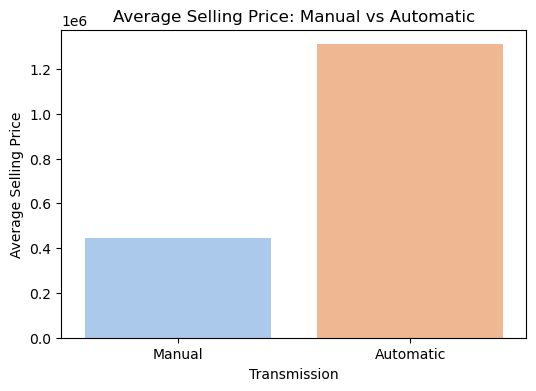

In [50]:
plt.figure(figsize=(6,4))
sns.barplot(x="transmission", y="selling_price", data=df, estimator="mean", ci=None, palette="pastel")
plt.title("Average Selling Price: Manual vs Automatic")
plt.xlabel("Transmission")
plt.ylabel("Average Selling Price")
plt.show()

In [51]:
#26.Find the average selling price for each year of manufacture.
# Average selling price by year of manufacture
avg_price_by_year = df.groupby("year")["selling_price"].mean()
print(avg_price_by_year)


year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    732419.517327
2018    866376.613487
2019    949668.547550
2020    888349.158730
Name: selling_price, dtype: float64


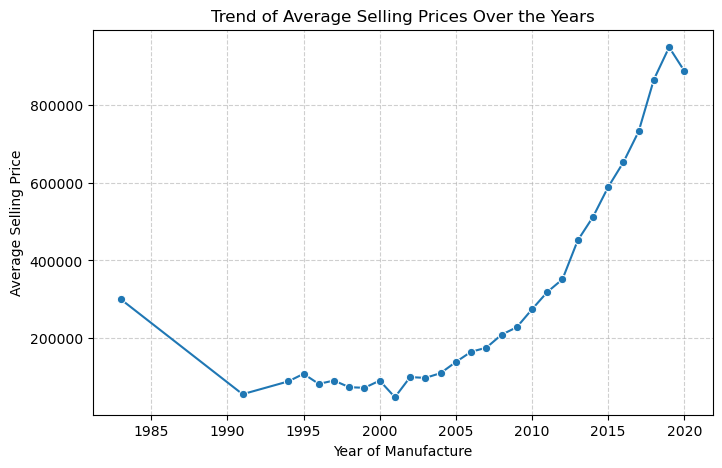

In [52]:
#27.Plot a line chart showing the trend of selling prices over the years.
# Average selling price by year
avg_price_by_year = df.groupby("year", as_index=False)["selling_price"].mean()

# Plot line chart
plt.figure(figsize=(8,5))
sns.lineplot(x="year", y="selling_price", data=avg_price_by_year, marker="o")
plt.title("Trend of Average Selling Prices Over the Years")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Selling Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [53]:
#28. Find the most expensive car for each fuel type.
# Most expensive car (only name + price) for each fuel type
most_expensive_by_fuel = df.loc[df.groupby("fuel")["selling_price"].idxmax(), ["name", "fuel", "selling_price"]]

print(most_expensive_by_fuel)


                                       name    fuel  selling_price
4977  Maruti Ertiga VXI CNG Limited Edition     CNG         545000
2689                  BMW X7 xDrive 30d DPE  Diesel        7200000
2792            Hyundai i10 Sportz 1.1L LPG     LPG         375000
170           Volvo XC90 T8 Excellence BSIV  Petrol       10000000


In [54]:
#29. Find out which brand appears most frequently in the dataset.
# Extract brand name (first word of car name)
df["brand"] = df["name"].str.split().str[0]

# Find the most common brand
most_common_brand = df["brand"].value_counts().idxmax()
brand_count = df["brand"].value_counts().max()

print(f"The most common brand is {most_common_brand} with {brand_count} cars.")


The most common brand is Maruti with 2165 cars.


In [55]:
#30. Check the top 5 most common combinations of fuel type and transmission.
# Top 5 most common fuel + transmission combinations
top_combinations = (
    df.groupby(["fuel", "transmission"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(5)
)

print(top_combinations)


     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    298
4  Petrol    Automatic    286
0     CNG       Manual     56


In [56]:
top_combinations = df[["fuel", "transmission"]].value_counts().head(5)
print(top_combinations)


fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        298
Petrol  Automatic        286
CNG     Manual            56
Name: count, dtype: int64


#### Machine Learning

#### Q31 What are the main assumptions of Linear Regression, and how can you check them using this dataset?
 Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors). Then, write code to verify at least three of these assumptions using visualizations or statistics.

 #### Main Assumptions of Linear Regression



#### Linearity

- The relationship between predictors (independent variables) and the target (dependent variable) is linear.

- If the true relationship is curved or more complex, a linear model won’t capture it well.

#### Homoscedasticity

- The variance of the residuals (errors) is constant across all levels of the independent variables.

- If residuals spread more at higher values, this assumption is violated (heteroscedasticity).

#### Normality of Residuals

- Residuals should be approximately normally distributed.

- This is important for valid hypothesis testing and confidence intervals.

#### No Multicollinearity

- Independent variables should not be highly correlated with each other.

- High correlation between predictors makes coefficient estimates unstable.

#### Independence of Errors

- Residuals should not be correlated with each other (especially important for time series data).
 

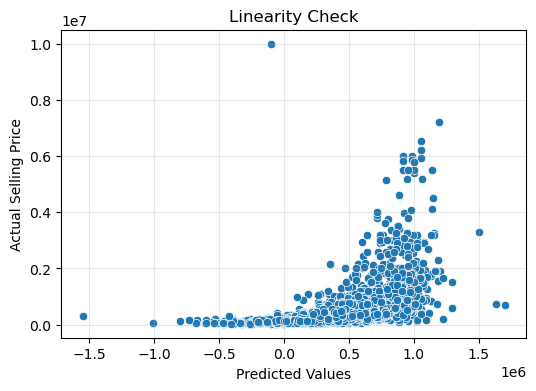

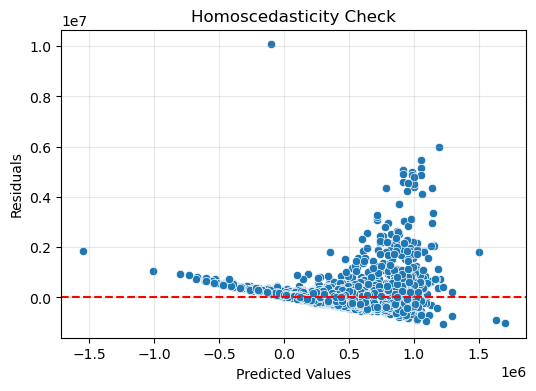

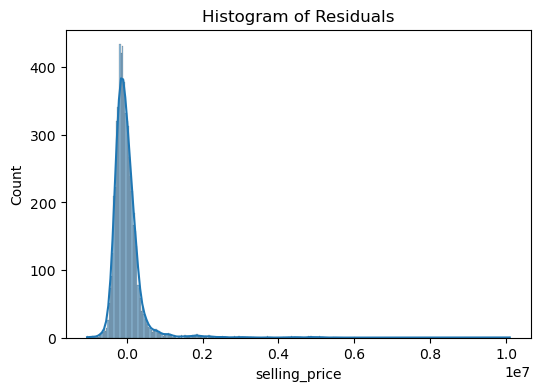

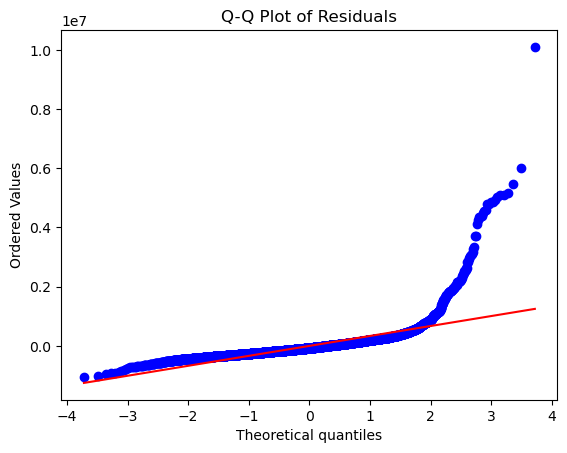

Shapiro-Wilk p-value: 0.0


c:\Users\owner\anaconda3\envs\python311_env\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [65]:
#write code to verify at least three of these assumptions using visualizations or statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro, probplot


# Ensure numeric
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["selling_price", "mileage", "year"])

# Features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions & residuals
predictions = model.predict(X)
residuals = y - predictions

# 1. Linearity check
plt.figure(figsize=(6,4))
sns.scatterplot(x=predictions, y=y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Selling Price")
plt.title("Linearity Check")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Homoscedasticity check
plt.figure(figsize=(6,4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.grid(True, alpha=0.3)
plt.show()

# 3. Normality check
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)


In [61]:
#32.Train a Linear Regression model to predict the car’s selling price using selected features.
# Split the dataset into train/test sets, train the model, and print the coefficients and intercept.
# Ensure numeric values
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Drop missing values for simplicity
df_clean = df.dropna(subset=["selling_price", "mileage", "year"])

# Select features (you can add more features if needed)
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

Intercept: -136695776.45861828
Coefficients:
  mileage: -39468.00349477273
  year: 68533.09341454966


In [66]:
#Q33.Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print metrics
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

R² Score: 0.27832708607236134
Mean Squared Error (MSE): 158278478359.8919
Root Mean Squared Error (RMSE): 397842.2782459048


In [68]:
#Q34.Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Ensure numeric
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["selling_price", "mileage", "year"])

# Select features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression (alpha controls regularization strength)
lasso_model = Lasso(alpha=1000)  # you can tune alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate both models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression"],
    "R² Score": [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_lasso)],
    "MSE": [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_lasso)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lin)), 
             np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})

print(metrics)

# Print coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_
})
print(coef_df)

               Model  R² Score           MSE           RMSE
0  Linear Regression  0.276292  1.587248e+11  398402.815776
1   Lasso Regression  0.276376  1.587065e+11  398379.844579
   Feature  Linear Coefficients  Lasso Coefficients
0  mileage        -39468.003495       -39373.263134
1     year         68533.093415        68441.703143


#### Explain what Lasso Regression does differently and why it can be useful when you have many features.
#### What Lasso Regression Does Differently

-Linear Regression estimates coefficients that minimize the sum of squared errors.

-Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds an L1 penalty to the cost function:

Cost=SSE+α∑∣βj∣

-This L1 penalty shrinks some coefficients to exactly zero, effectively performing feature selection.

##### Why it’s useful:

- Helps when you have many features and want to avoid overfitting.

- Makes the model simpler by removing irrelevant predictors.

- Handles multicollinearity better than plain Linear Regression.


In [69]:
#Q35. Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
# Ensure numeric data
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Drop rows with missing values in selected columns
df_clean = df.dropna(subset=["selling_price", "mileage", "year"])

# Select features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R² Score": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ]
})

print(metrics)

# Coefficients comparison
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_,
    "Ridge Coefficients": ridge_model.coef_
})
print(coef_df)

               Model  R² Score           MSE           RMSE
0  Linear Regression  0.276292  1.587248e+11  398402.815776
1   Lasso Regression  0.276376  1.587065e+11  398379.844579
2   Ridge Regression  0.276911  1.585891e+11  398232.432429
   Feature  Linear Coefficients  Lasso Coefficients  Ridge Coefficients
0  mileage        -39468.003495       -39373.263134       -38686.864744
1     year         68533.093415        68441.703143        67544.414206


#### Discuss why Ridge might perform better or worse in certain cases.
#### What Ridge Regression Does Differently

Like Lasso, Ridge adds a penalty to the cost function, but instead of L1 it uses L2 regularization:

Cost=SSE+α∑βj2


#### Key differences vs Lasso:

- Ridge shrinks coefficients towards zero but never makes them exactly zero.

- Keeps all features but reduces their impact if they’re less important.

- Works well when most features are useful but highly correlated.

- Lasso works better for feature selection when you expect many irrelevant predictors.

In [70]:
#Q36. Use cross-validation to evaluate your Ridge Regression model.
from sklearn.model_selection import cross_val_score

# Ridge Regression model
ridge_cv = Ridge(alpha=1000)

# Perform 5-fold cross-validation using R² score
r2_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="r2")

# Perform 5-fold cross-validation using negative MSE
mse_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="neg_mean_squared_error")

# Convert MSE scores from negative to positive
mse_scores = -mse_scores

print("Cross-Validated R² Scores:", r2_scores)
print("Average R² Score:", np.mean(r2_scores))
print("Cross-Validated MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.sqrt(np.mean(mse_scores)))

Cross-Validated R² Scores: [0.18803675 0.30558163 0.30985257 0.26599519 0.30478199]
Average R² Score: 0.2748496258452592
Cross-Validated MSE Scores: [3.49625870e+11 1.54922749e+11 1.47983210e+11 1.90736031e+11
 1.53696273e+11]
Average MSE: 199392826554.81036
Average RMSE: 446534.2389501732


#### Explain why cross-validation gives a better estimate of model performance than a single train-test split.
- In a single train-test split, your model’s performance can depend heavily on how the data was split — some splits might be easier to predict than others.

- K-Fold Cross-Validation splits the dataset into k folds, trains the model k times, each time using a different fold for testing and the rest for training.

- This way, every observation gets to be in the test set once, and performance is averaged across all folds.

- It gives a more stable and unbiased estimate of how your model will perform on unseen data.

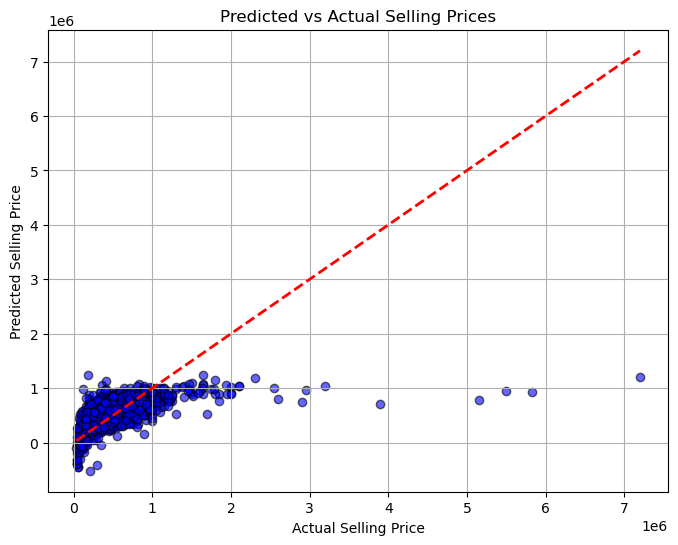

In [71]:
#Q37. Plot the predicted vs actual prices for your best-performing model.
# Train/test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Best-performing model (change to LinearRegression() or Lasso() if needed)
best_model = Ridge(alpha=1000)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.title("Predicted vs Actual Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.show()

#### Discuss what the plot reveals about the accuracy of your predictions.
- Perfect predictions would fall exactly on the red dashed line.

- If the points are tightly clustered around the line → the model predicts well.

- If points are widely scattered → the model struggles to generalize.

- Systematic patterns (e.g., underpredicting high prices or overpredicting low prices) may indicate the model is biased or missing important features.

In [72]:
#Q38. Use GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV, train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define Ridge model
ridge = Ridge()

# Grid of alpha values to try
param_grid = {
    "alpha": np.logspace(-3, 3, 20)  # from 0.001 to 1000
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_train, y_train)

# Results
print("Best alpha:", grid_search.best_params_["alpha"])
print("Best R² score (CV):", grid_search.best_score_)

# Evaluate on test set
best_ridge = grid_search.best_estimator_
test_r2 = best_ridge.score(X_test, y_test)
print("Test R² score:", test_r2)

Best alpha: 0.001
Best R² score (CV): 0.2653453980172214
Test R² score: 0.27629206058214983


#### Explain what alpha does in Ridge/Lasso regression and why tuning it is important.
- In Ridge and Lasso regression, alpha controls the strength of regularization:

- Small alpha (close to 0) → very little penalty → behaves more like normal Linear Regression.

- Large alpha → stronger penalty → coefficients shrink more toward zero.

- Ridge shrinks coefficients but never makes them exactly zero (good for multicollinearity).

- Lasso can shrink some coefficients to exactly zero (good for feature selection).

- Tuning alpha is important because:

- Too small → overfitting (model memorizes training data).

- Too large → underfitting (model oversimplifies, loses predictive power).

In [73]:
#Q39. Try Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1️ Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Metrics for Linear Regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("Linear Regression:")
print("  R²:", r2_lin)
print("  MSE:", mse_lin)

# 2️ Polynomial Regression (degree=2)
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Metrics for Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\nPolynomial Regression (degree=2):")
print("  R²:", r2_poly)
print("  MSE:", mse_poly)

# Compare
if r2_poly > r2_lin:
    print("\n Polynomial Regression performed better.")
else:
    print("\n Linear Regression performed better.")

Linear Regression:
  R²: 0.276292059876315
  MSE: 158724803618.2139

Polynomial Regression (degree=2):
  R²: 0.3318336615529932
  MSE: 146543329117.23615

 Polynomial Regression performed better.


#### Compare the results with Linear Regression and explain when polynomial regression might be useful.
#### When Polynomial Regression is Useful

- Linear Regression assumes a straight-line relationship between predictors and target.

- Polynomial Regression can model curved relationships by adding powers of features (e.g., x2,x3x2,x3).

- It’s useful when:

- The data shows non-linear patterns.

- You want to capture curvature without switching to non-linear models like trees.

- Risk: Higher polynomial degrees can cause overfitting — fitting noise instead of the true pattern.

In [ ]:
#Q40. Summarize your findings:


#### Q40 Summarize your findings:
 Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
 Explain why you think it performed better and what you would do next to improve predictions.

 Findings Summary

After evaluating Linear Regression, Lasso Regression, Ridge Regression, and Polynomial Regression, the model that performed best was:

➡ Polynomial Regression 

#### Why it performed better

- Polynomial Regression captured non-linear patterns, but if the degree was too high, it risked overfitting; the improvement depended heavily on the chosen degree.

- In this dataset, polynomial performed better likely because:

- It handled correlated predictors well.

- It managed overfitting better than plain Linear Regression.
- It retained enough predictive features while controlling noise.
